# Practice Session 07: Network models


Author: <font color="black">Tània Pazos</font>

E-mail: <font color="black">tania.pazos01@estudiant.upf.edu</font>

Date: <font color="black">November 3, 2023</font>

# 1. Random (ER) graph generator

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

The following function returns `True` with probability *p*, and `False` with probability *1-p*.

In [2]:
def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

The following code defines a function `generate_random_graph` that creates an undirected random graph with N nodes numbered from 0 to N-1, adds an edge between every pair of nodes and returns the resulting graph.

In [3]:
def generate_random_graph(N, p):
    G = nx.Graph() # Create an empty undirected graph
    
    # Generate all nodes
    for node in range(N):
        G.add_node(node)
        
    # Add edges between all pairs of nodes with probability p
    for u, v in itertools.combinations(G.nodes, 2):
        if flip_coin(p):
            G.add_edge(u, v)
            
    return G

Now, to check whether our generator produces the correct number of edges, we generate 300 graphs with a determined connection probability and number of nodes. The number of edges of each graph is stored in the array `observed_edges`, while the expected number of edges is stored in the array `expected_edges`.

In [4]:
N = 30 # Number of nodes
p = 0.4 # Connection probability
trials = 300 # Number of graphs we want to generate
observed_edges = []

for graph in range(trials):
    g = generate_random_graph(N, p)
    
    # Keep track of the observed number of edges
    observed_edges.append(g.number_of_edges())

The following code compares visually the number of expected edges, computed as ``expected_edges``, with the number of actual edges.

In [5]:
# Apply the formula to compute the number of expected edges
expected_edges = (N * (N - 1) / 2) * p

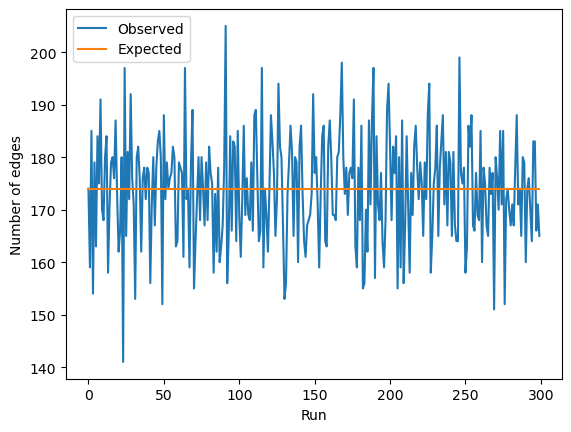

In [6]:
plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

Now, let's create a new generator `generate_random_graph_avg_degree` that, given a target number of nodes and a target average degree, determines the appropriate value of `p` to call `generate_random_graph`.

In [7]:
def generate_random_graph_avg_degree(N, kavg):
    # Calculate p based on the target average degree
    approp_p = kavg / (N - 1)
    
    # Create and return a random graph using the computed p
    g = generate_random_graph(N, approp_p)
    return g

To test our new generator, we will define the function `graph_average_degree` that returns the average degree of a graph.

In [8]:
def graph_average_degree(G):
    # Compute the average degree as 
    # 2 times the number of edges divided by the number of nodes
    return 2 * G.number_of_edges() / G.number_of_nodes()

Then, we generate a series of graphs with a determined number of nodes N and expected average degree between 0.0 and 3.0 in increments of 0.1.

In [9]:
start = 0.0
end = 3.0
step = 0.1

# Compute the number of steps between the range
# to fill the list of expected degrees
num_steps = int((end - start) / step)

# Define the number of nodes
N = 400

observed_average_degrees = []
target_average_degrees = []

# Create the series of graphs with different target average degrees
# Compute average degrees adding 0.1 from start to end
for i in range(num_steps):
    # Average degree are multiples of 0.1 rounded to first decimal
    g = generate_random_graph_avg_degree(N, round(0.1*i, 1))
    kavg = graph_average_degree(g)
    observed_average_degrees.append(kavg)
    target_average_degrees.append(round(0.1*i, 1))

The following compares visually the target average degree with the observed average degree.

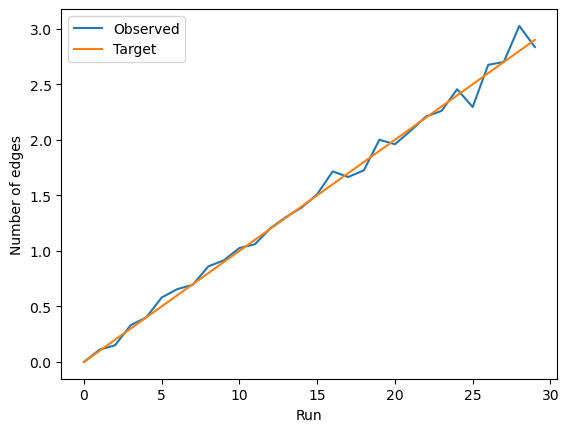

In [10]:
plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(len(target_average_degrees)), observed_average_degrees, label="Observed")
plt.plot(range(len(target_average_degrees)), target_average_degrees, label="Target")
plt.legend()
plt.show()

## 1.2. Measure connectivity


Let's create a function `is_connected` that, given a graph, returns True if the graph is connected and False otherwise. 

In [11]:
def is_connected(G):
    # Create a list with all nodes of the graph
    nodes = list(G.nodes)
    
    # If the graph is empty or is a singleton, it is connected
    if not nodes or len(nodes) == 1:
        return True
    
    # Check if there is a path between every pair of nodes
    for u, v in itertools.combinations(nodes, 2):
        if not nx.has_path(G, u, v):
            return False
        
    # After iterating through all pairs
    return True

The following code returns the size of the largest connected component on a graph.

In [12]:
def size_largest_cc(G):
    
    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])
    
    # Returns its number of nodes
    return G0.number_of_nodes()

Now, we create a series of ER graphs having *N=500* nodes and target average degree between *0.3* and *3.0* in increments of *0.05*. We will record (1) their observed average degrees and (2) the size of their largest connected component as a fraction of the total number of nodes.

In [26]:
N = 500
target_average_degrees = np.arange(0.3, 3.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    # Check if the number of nodes of the graph is equal to N
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    average_degree = graph_average_degree(g)
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = size_largest_cc(g) / N
    largest_cc_sizes.append(largest_cc_size)

We generate a scatter plot with the average degree in the X axis and the size of the largest connected component as a fraction of the number of nodes in the Y axis.

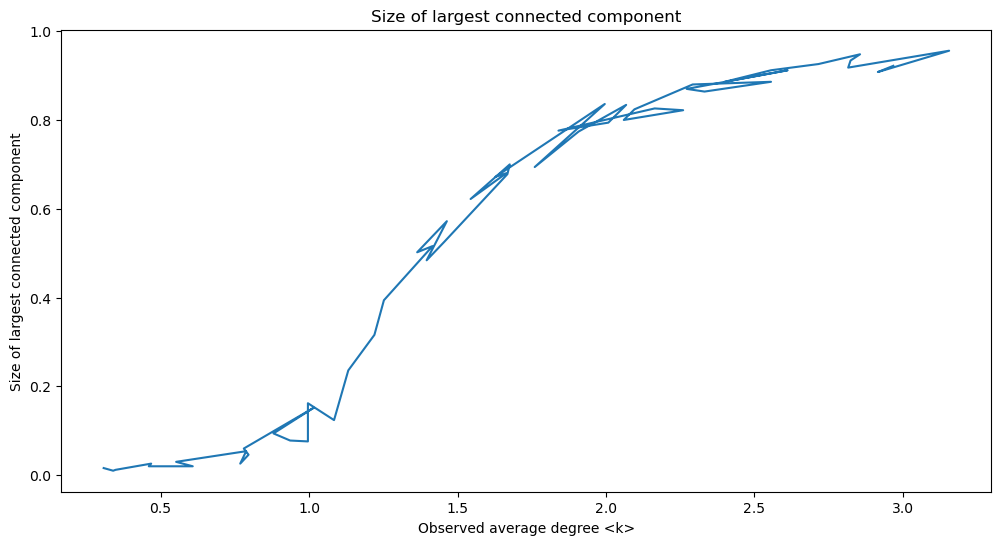

In [27]:
plt.figure(figsize=(12,6))
plt.plot(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

The theory states that the size of the largest connected component should notably increase when the average degree in an ER random graph becomes greater than a critical value, which is approximately at an average degree of 1.0. <p>
In this particular case, the size of the largest connected component increases significantly at an average degree of around 1.2. <p>
The curve depicted above is not a function -specifically, not univalent- because a unique average degree value (x-axis) points to more than one value for the size of the largest connected component (y-axis). 

## 1.3. Visualize graphs and plot degree distributions

The following code generates and visualizes 3 ER graphs of about 100 nodes each. 

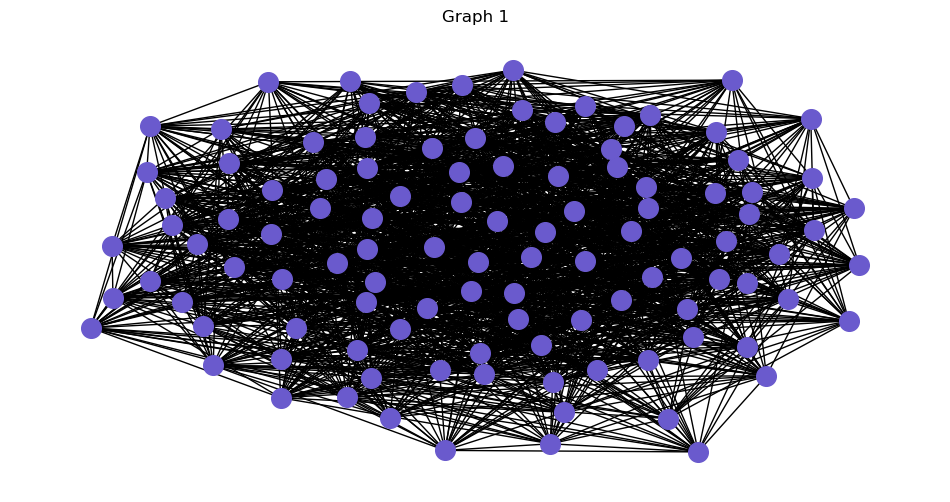

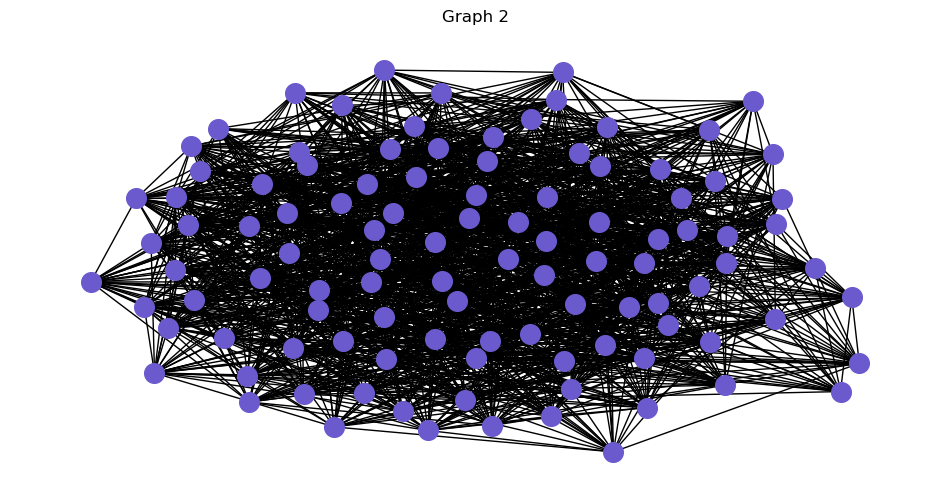

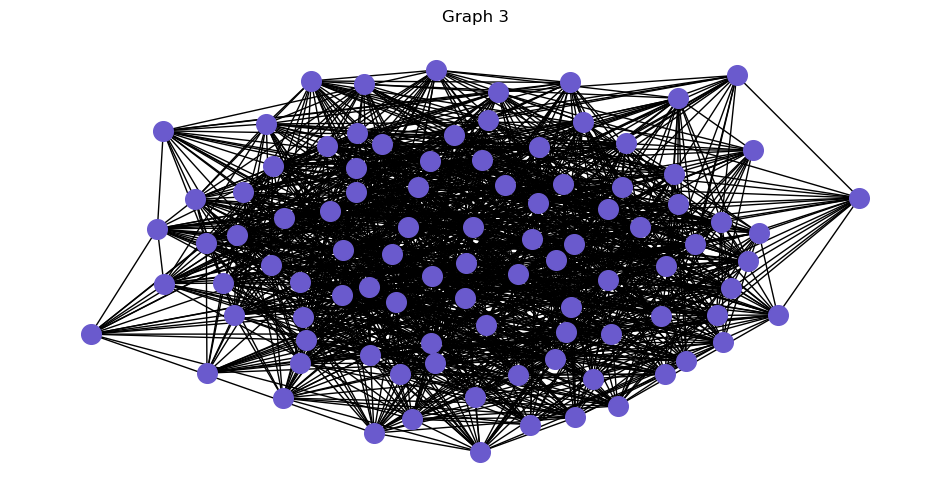

In [15]:
num_graphs = 3
p = 0.3

for i in range(num_graphs):
    N = np.random.randint(90, 110)
    g = generate_random_graph(N, p)
    plt.figure(figsize=(12,6))
    plt.title(f"Graph {i+1}")
    plt.axis("off")
    
    # Generate a connected random graph
    # Regenerate the graph if it is not connected
    while not is_connected(g):
        g = generate_random_graph(N, p) 
        
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_size=200,
                     node_color='slateblue')

The following function `print_er_statistics` prints, given an ER graph and a probability *p*, the observed average degree *&lt;k&gt;* and its expected average degree.


In [16]:
def print_er_statistics(g, p):
    N = g.number_of_nodes()
    
    # Store degrees of all nodes in a dictionary
    # Keys are nodes and values are degrees
    degrees = dict(g.degree())
    
    # Sum degrees of all nodes
    total_degree = sum(degrees.values())
    
    # Calculate the observed average degree
    # As the sum of all degrees divided by the number of nodes
    observed_average_degree = total_degree / N
    
    # Calculate the expected average degree
    expected_average_degree = p * (N - 1)
    
    print("Observed average degree:", observed_average_degree)
    print("Expected average degree:", expected_average_degree)

Now, let's print the statistics for three ER graphs with the same parameters as the graphs generated above.

Graph 1
Observed average degree: 61.27450980392157
Expected average degree: 60.599999999999994


Graph 2
Observed average degree: 61.33980582524272
Expected average degree: 61.199999999999996


Graph 3
Observed average degree: 61.00970873786408
Expected average degree: 61.199999999999996




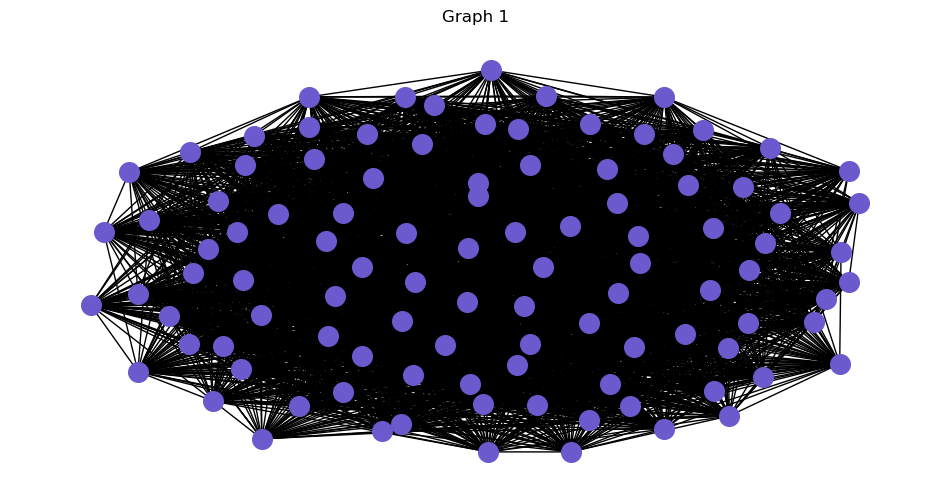

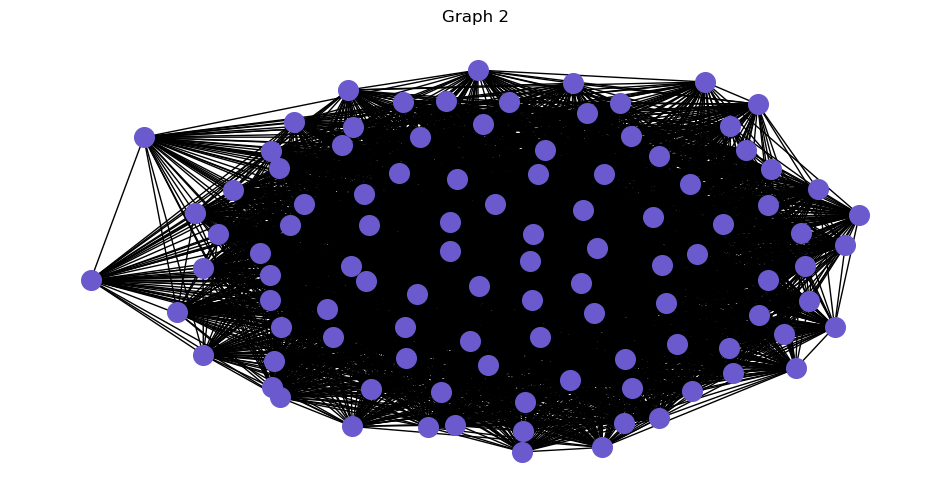

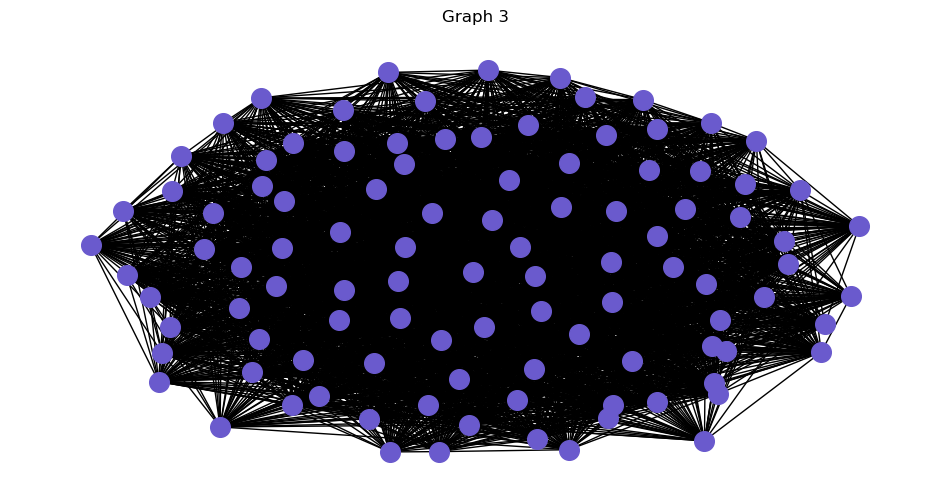

In [17]:
num_graphs = 3
p = 0.6

for i in range(num_graphs):
    N = np.random.randint(90, 110)
    g = generate_random_graph(N, p)
    plt.figure(figsize=(12,6))
    plt.title(f"Graph {i+1}")
    plt.axis("off")
    
    # Generate a connected random graph
    # Regenerate the graph if it is not connected
    while not is_connected(g):
        g = generate_random_graph(N, p) 
        
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_size=200,
                     node_color='slateblue')
    
    # Print statistics for the current graph
    print(f"Graph {i+1}")
    print_er_statistics(g, p)
    print("\n")

The following function plots the degree distribution of a graph.

In [18]:
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

The following code displays five ER graphs with N between 1500 and 3000 nodes and different probabilities *p*, that increase gradually. Below is included a drawing of each graph, its degree distribution, observed average degree, and expected average degree.

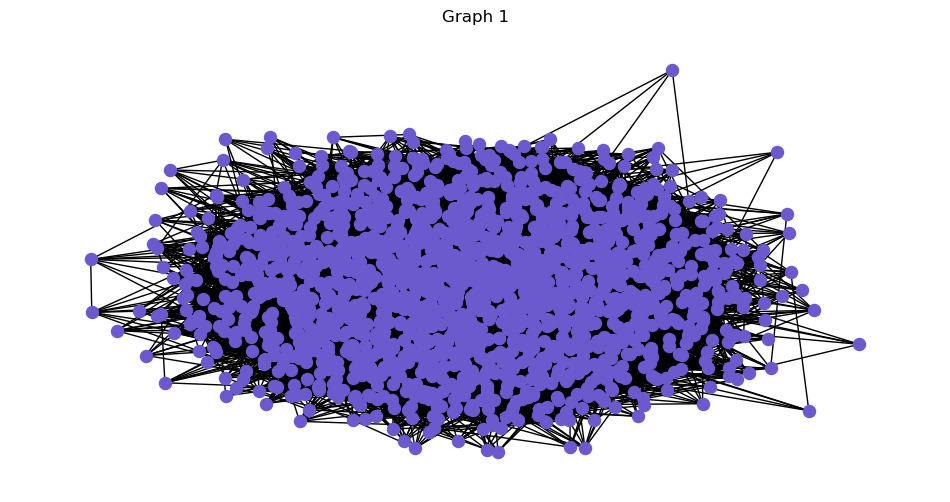

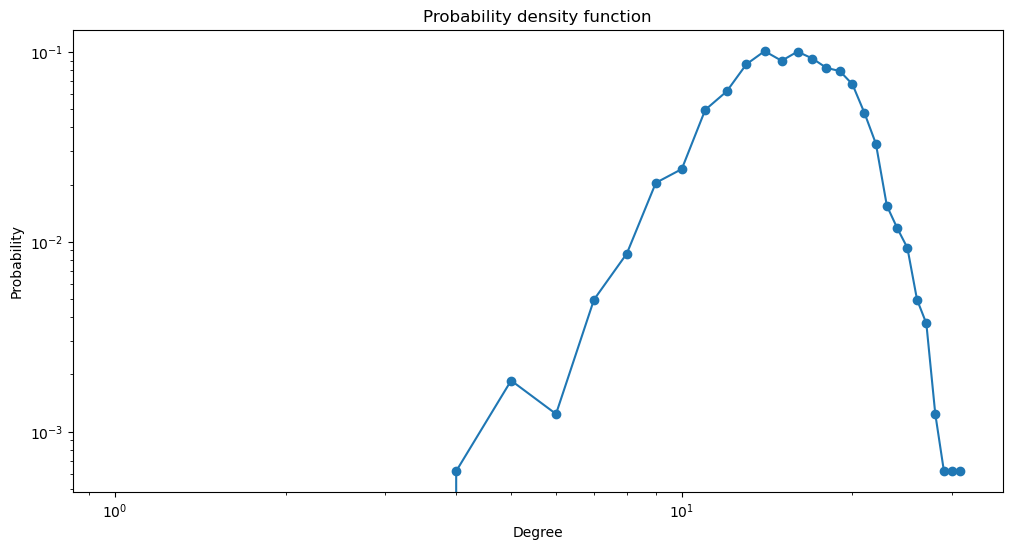

Observed average degree: 16.129950495049506
Expected average degree: 16.15


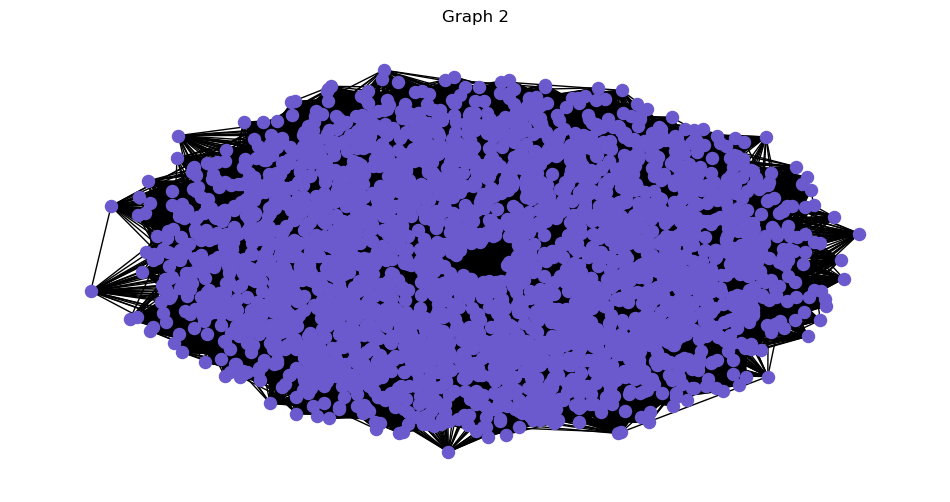

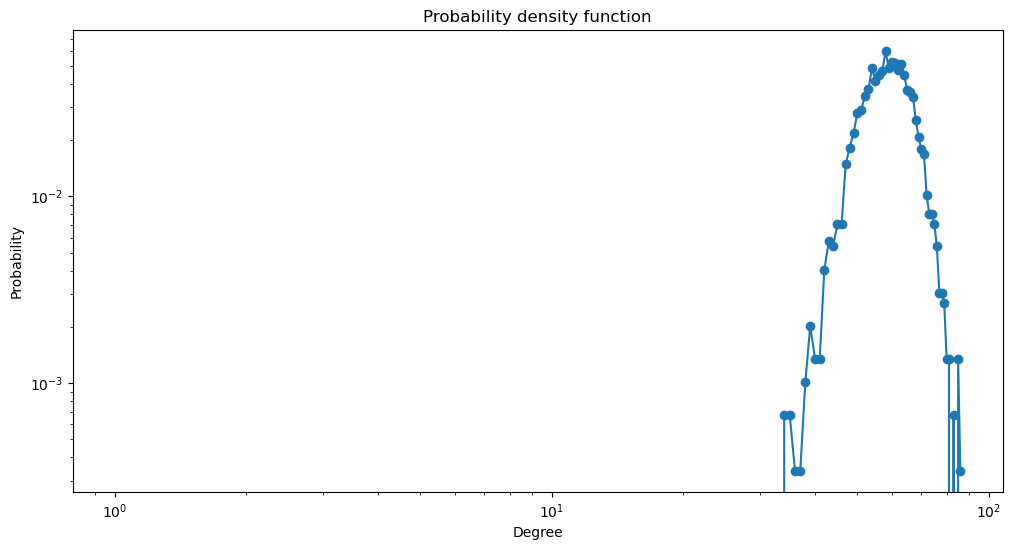

Observed average degree: 59.331311088641726
Expected average degree: 59.32


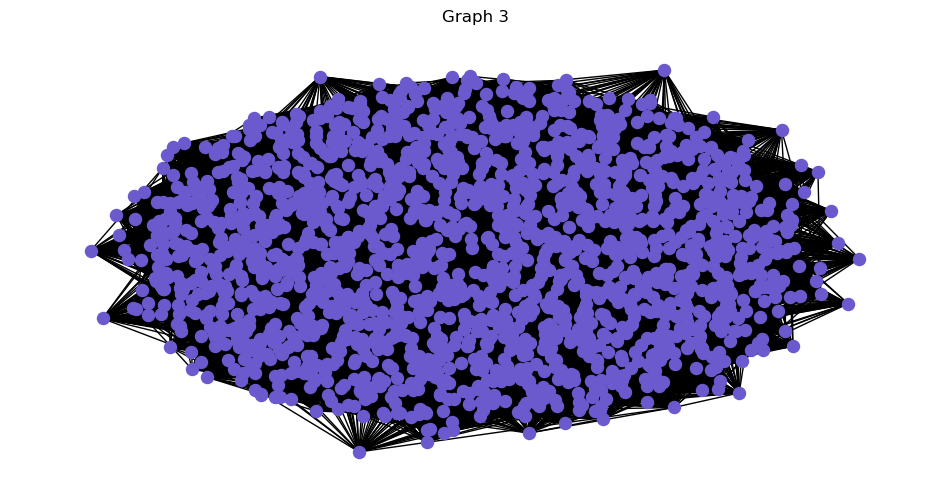

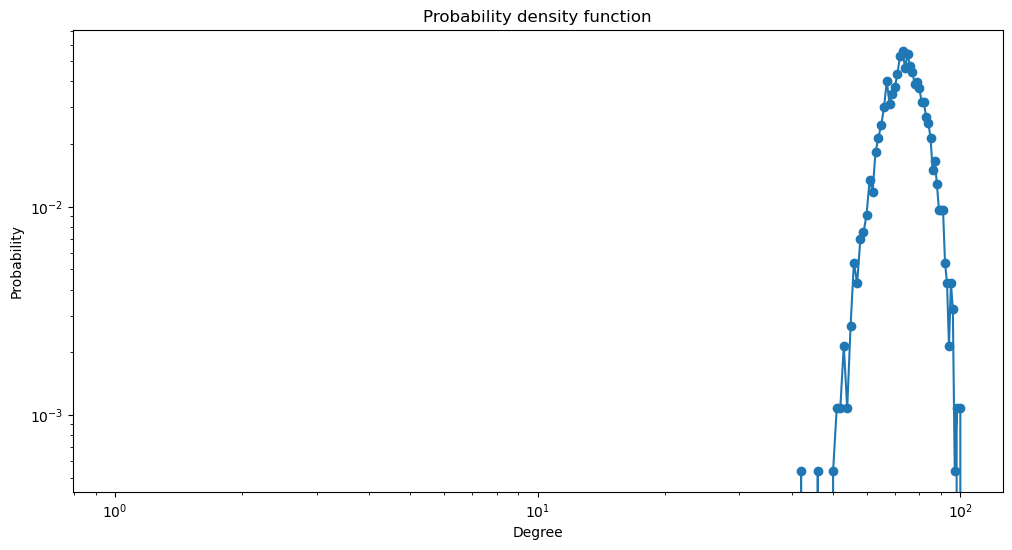

Observed average degree: 74.53949489521763
Expected average degree: 74.4


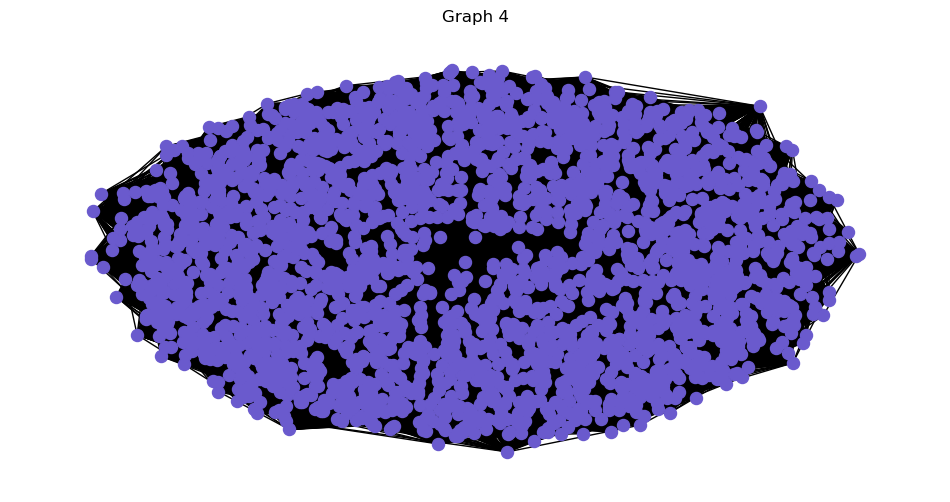

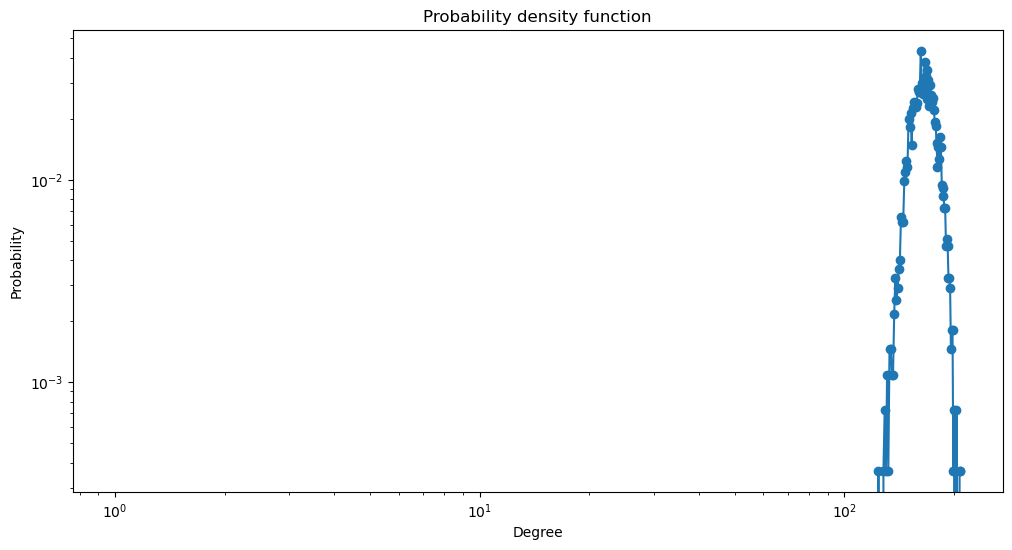

Observed average degree: 165.82293178519595
Expected average degree: 165.29999999999998


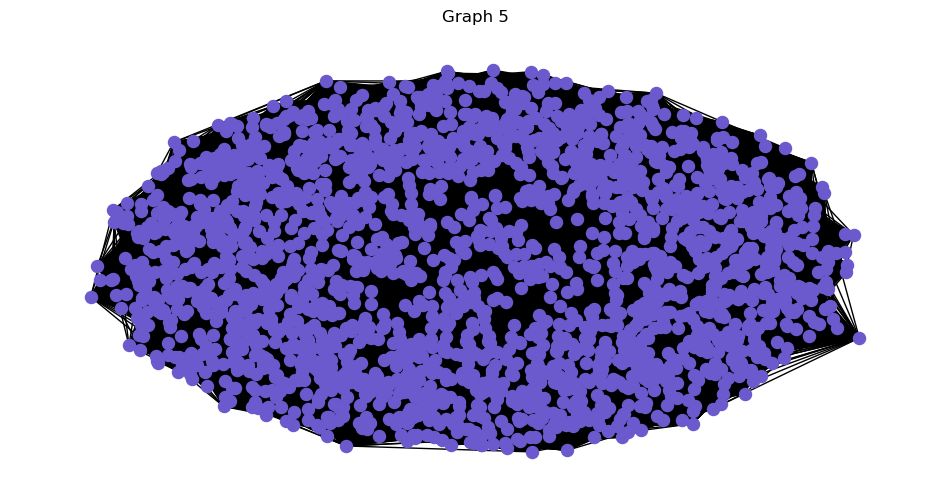

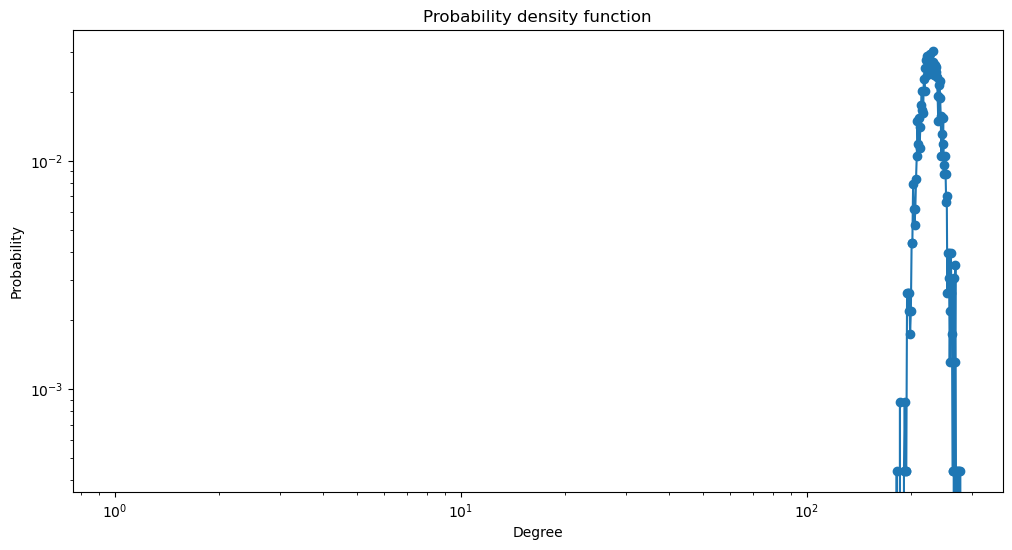

Observed average degree: 229.09242225142356
Expected average degree: 228.20000000000002


In [19]:
p_values = [0.01, 0.02, 0.04, 0.06, 0.10]

for i in range(5):
    N = np.random.randint(1500, 3000)
    p = p_values[i]
    
    g = generate_random_graph(N, p)
    
    # Draw the graph
    plt.figure(figsize=(12,6))
    plt.title(f"Graph {i+1}")
    plt.axis("off")
    pos = nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=False, node_size=75,
                     node_color='slateblue')

    # Plot degree distribution
    plot_degree_distribution(g)
    
    # Print observed average degree and
    # expected average degree
    print_er_statistics(g, p)

Firstly, it should be noted that, as the probability increases, so does the average degree. <br>
What is more, the possible degree values depicted in the degree distribution become more and more constraint. Indeed, the first graph has a wide range of node degrees compared to the last graph. <br>
Finally, it is worth pointing out that the number of nodes does not play the role that the probability plays, i.e., it does not affect the average degree nor the degree distribution, since selecting a number of nodes at random does not affect the evolution commented above.

# 2. Preferential attachment (BA) generator

The following function, `select_with_probability(x, m, p)` selects *m* elements from set *x* according to probabilities in *p*, without replacement.

In [20]:
def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

The next cell tests this function.

In [21]:
trials = 2000
vector = ['a', 'b', 'c', 'd']
probabilities = [0.60, 0.15, 0.12, 0.13]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)
    
for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1221 times, expected 1200
Element b was selected 286 times, expected 300
Element c was selected 250 times, expected 240
Element d was selected 243 times, expected 260


Now, let's crete an auxiliary function, `select_targets(g, m)` that selects *m* target nodes in a graph *g*, with probabilities proportional to the degrees of the nodes. 

In [22]:
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0
    for node in g.nodes():
        sum_degree += g.degree(node)
        
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        prob = degree / sum_degree
        probabilities.append(prob)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected

Now, we create a function `generate_preferential_attachment_graph(N, m0, m)` that:

1. Checks that *m <= m0* or raises a ValueError
1. Creates an empty graph
1. Adds nodes numbered from *0* to *m<sub>0</sub> - 1* to the graph
1. Creates a cycle by linking node *0* to node *1*, node *1* to node *2*, ..., node *m<sub>0</sub>-1* to node *0*
1. For every node *u* numbered from *m<sub>0</sub>* to *N - 1*
   1. Selects *m* targets for this node using `select_targets`
   1. Adds node *u* (remember to select targets **before** adding the node *u*)
   1. Links each node *u* to each of the *m* targets
1. Returns the graph

In [23]:
def generate_preferential_attachment_graph(N, m0, m):
    # Check that m <= m0
    if m > m0:
        raise ValueError("m is greater than m0")
        
    # Create empty graph
    g = generate_random_graph(0, 0.4)
    
    # Add node from 0 to m0 - 1
    for i in range(m0):
        g.add_node(i)
        
    # Create a cycle
    for i in range(m0):
        # Connect last node to node 0
        if i == m0 - 1:
            g.add_edge(i, 0)
        # Connect every node with following node
        else:
            g.add_edge(i, i+1)
    
    # Select m targets
    for u in range(m0, N):
        targets = select_targets(g, m)
        g.add_node(u) # Add node
        for target in targets:
            # Connect each node u to each of the m targets
            g.add_edge(u, target)
    return g

The following code generates two preferential attachment (BA) graphs with nodes ranging from 1000 to 3000 and values of *m0* and *m* ranging from 1 to 10. Each graph includes its drawing and its degree distribution in log-log scale.

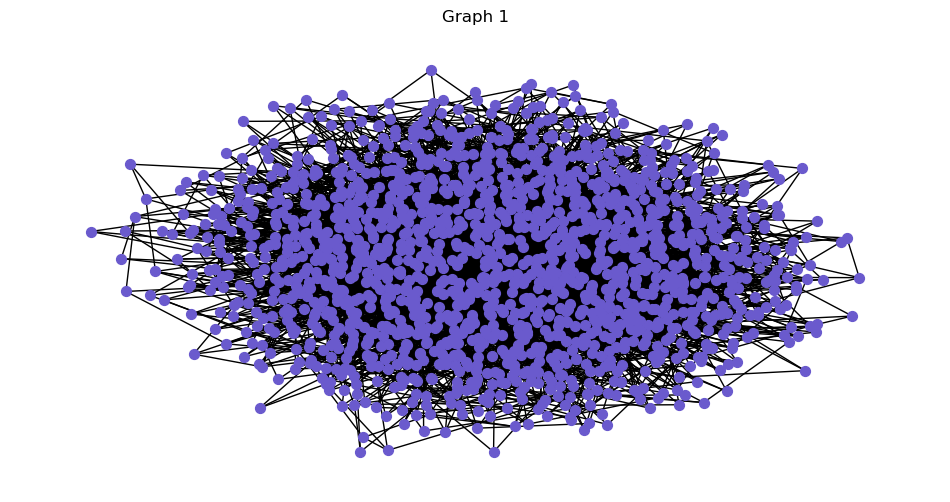

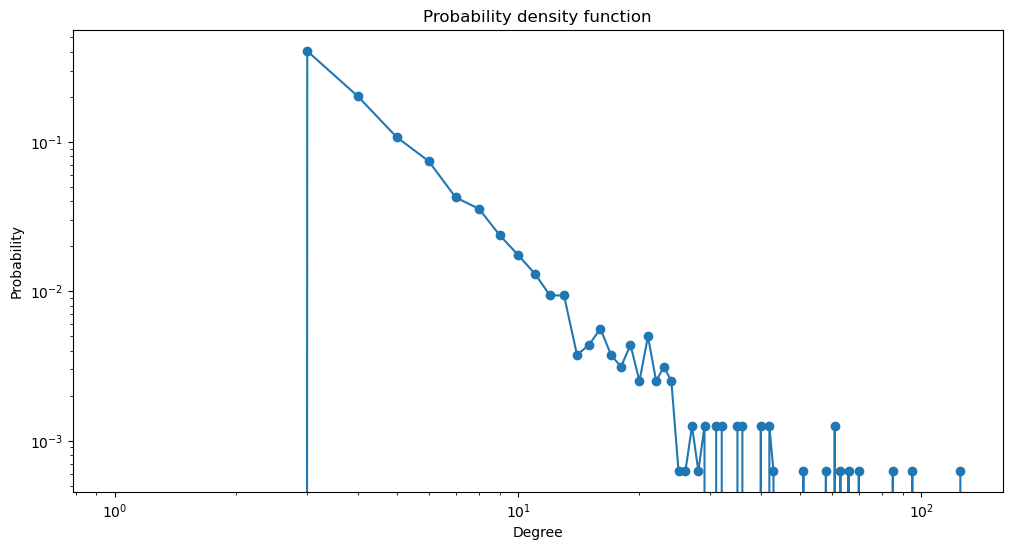

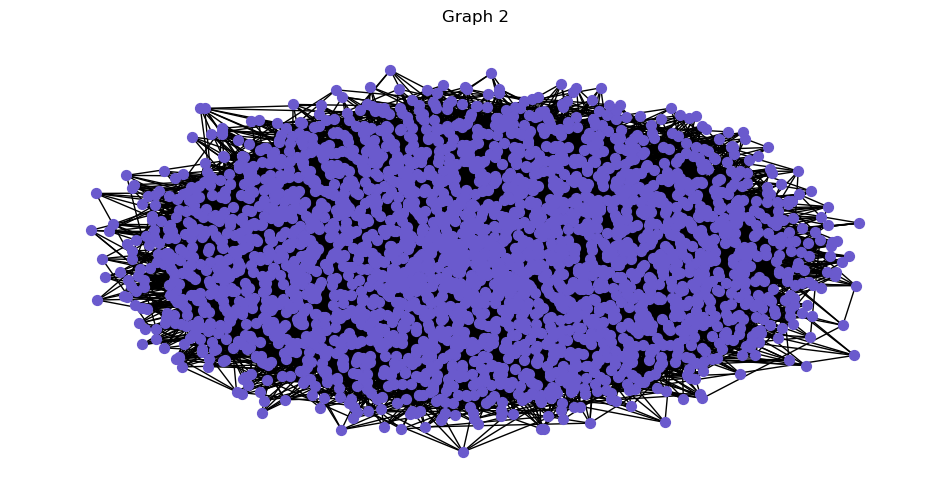

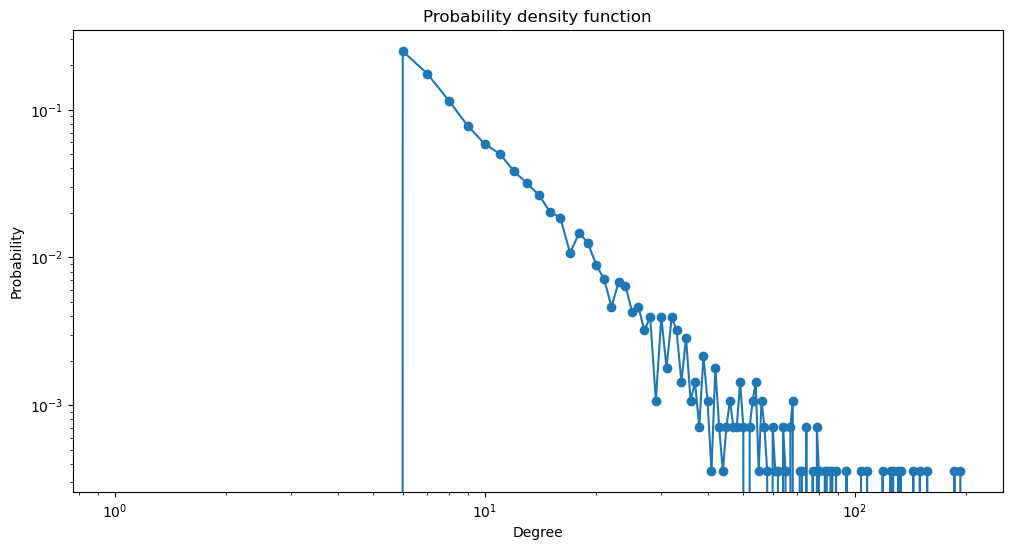

In [24]:
# Generate two BA graphs
g_ba1 = generate_preferential_attachment_graph(1600, 5, 3)
g_ba2 = generate_preferential_attachment_graph(2800, 8, 6)

# Draw graph and degree distribution
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.title("Graph 1")
pos = nx.spring_layout(g_ba1)  
nx.draw_networkx(g_ba1, pos, with_labels=False, node_size=50, node_color='slateblue')
plot_degree_distribution(g_ba1)

# For the second graph
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.title("Graph 2")
pos=nx.spring_layout(g_ba2)  
nx.draw_networkx(g_ba2, pos, with_labels=False, node_size=50, node_color='slateblue')
plot_degree_distribution(g_ba2)

The first graph (N = 1600, m0 = 5, and m = 3) has degree 10^0.5 with the highest probability -almost 1. Generally, as the degree value increases, the probablility of having such degree decreases. However, it should be noted that for the largest degrees the probability fluctuates, i.e., varies repeatedly from less than 10^-3 to 0, with few peaks from time to time that surpass 10^-0.3.
<p>
The second graph, with higher values for all parameters (N = 2800, m0 = 8, and m = 6) has a more confined range of possible degrees. Indeed, the degree with biggest probability -again, of around 1- is approximately 10^0.75. Then, similarly to the first graph, the probability decreases for larger degrees. Of course, the probabillity decreases more rapidly -since the degree range is more constrained-, though the probability for the largest degrees fluctuates in a similar way as the first graph. 

Finally, let's generate a BA graph of 300 nodes and plot in the X axis the node-id, and int the Y axis its degree.

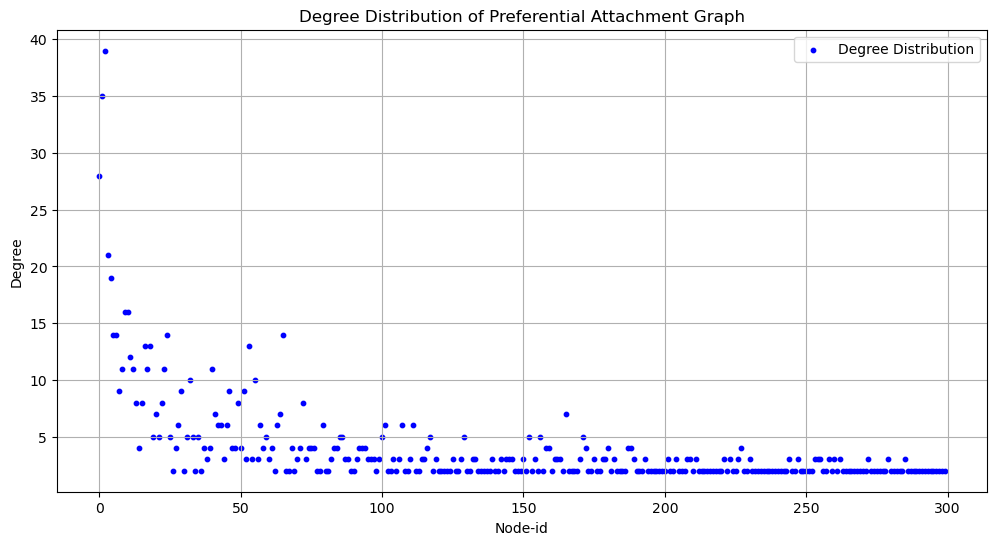

In [25]:
g = generate_preferential_attachment_graph(300, 4, 2)
nodes = []
degrees = []

# Add nodes and degrees in same position of two arrays
for (node, degree) in g.degree():
    nodes.append(node)
    degrees.append(degree)
    
# Plot graph with labeled axis
plt.figure(figsize=(12, 6))
plt.scatter(nodes, degrees, s=10, c='b', label='Degree Distribution')
plt.xlabel('Node-id')
plt.ylabel('Degree')
plt.title('Degree Distribution of Preferential Attachment Graph')
plt.legend()
plt.grid(True)
plt.show()

The figure above illustrates how -under preferential attachment- nodes that arrive at the beginning have a much larger degree than those at the end. Indeed, as nodes join the network, they attach themselves to the first existing nodes, which explains why these first nodes end up having high degrees. 
<br>
What is more, the first nodes have sparse degrees as there are no high-degree nodes they can attach to. As the network grows, however, new nodes preferentially attach to high-degree nodes, which results in more concentrated degrees for these last nodes.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>